In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [22]:
data = {'Natural Disasters': [95, 74, 536, 173],
        'Equipment Failure': [380, 62, 139, 35],
        'Human Attack': [334, 47, 119, 87],
        'Suspicious Activity': [158, 15, 34, 26],
        'Other': [33, 4, 11, 4],
        'Fuel Deficiency': [1, 4, 18, 27],
        'Generation Inadequency': [16, 3, 4, 1]}
dur = ['[0, 3) Hours  ', '[3, 6) Hours', '+6 Hours', 'Unknown']
each = {key: sum(data[key]) for key in data.keys()}
cum_each = {key: np.cumsum(data[key])/each[key] for key in data.keys()}
total=np.sum([sum(t) for t in data.values()])
outer_colors = ['#0000a2', '#e9c716', '#bc272d', '#50ad9f', '#4a2377', '#f4a700', '#800074']
inner_colors = ['#CCD1D1', '#99A3A4', '#616A6B', '#F5B7B1']


In [23]:
cum_each

{'Natural Disasters': array([0.10820046, 0.19248292, 0.80296128, 1.        ]),
 'Equipment Failure': array([0.61688312, 0.71753247, 0.94318182, 1.        ]),
 'Human Attack': array([0.56899489, 0.64906303, 0.85178876, 1.        ]),
 'Suspicious Activity': array([0.67811159, 0.74248927, 0.88841202, 1.        ]),
 'Other': array([0.63461538, 0.71153846, 0.92307692, 1.        ]),
 'Fuel Deficiency': array([0.02, 0.1 , 0.46, 1.  ]),
 'Generation Inadequency': array([0.66666667, 0.79166667, 0.95833333, 1.        ])}

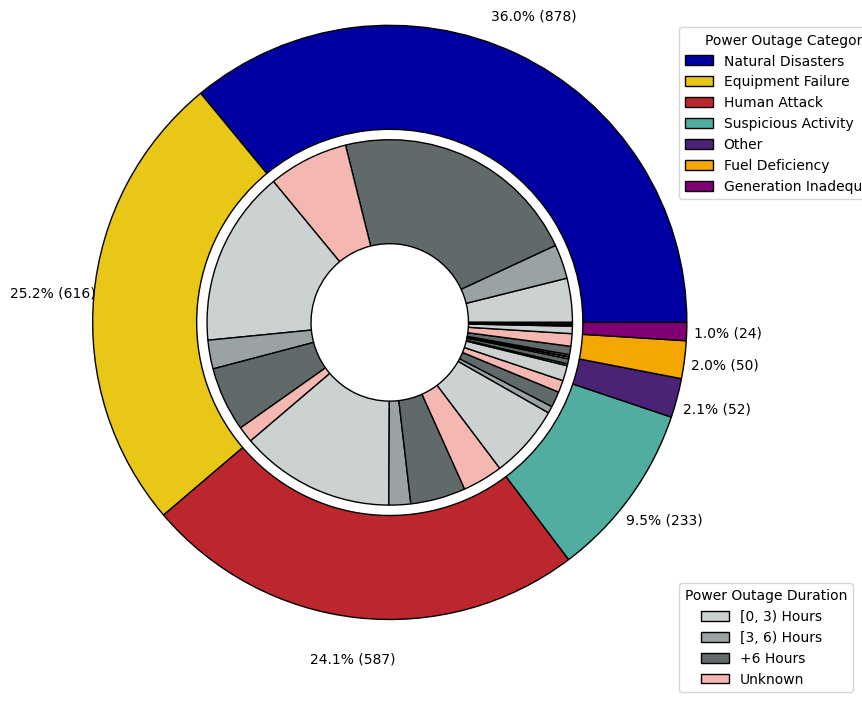

In [51]:
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(projection="polar"))

size = 0.35
keys = list(data.keys())
vals = np.array([data[keys[0]], data[keys[1]],
                 data[keys[2]], data[keys[3]],
                 data[keys[4]], data[keys[5]],
                 data[keys[6]]])
# Normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
# Obtain the cordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.colormaps["tab20c"]

outer_bars = ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='black', linewidth=1, align="edge",
       label=data.keys())

# Add percentages to outer slices
for i, (bar, val) in enumerate(zip(outer_bars, vals)):
    angle = valsleft[i, 0] + valsnorm[i, 0] / 2
    xpos = bar.get_x() + bar.get_width() / 2
    ypos = bar.get_y() + bar.get_height() / 2
    ax.text(xpos, 1.38*ypos, f"{np.sum(val)/np.sum(vals)*100:0.1f}% ({int(np.sum(val))})",
            ha='center', va='center')


ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2.1*size, height=size,
       color=inner_colors, edgecolor='black', linewidth=1, align="edge",
       label=[i for i in dur] * 7)

# Create legends
handles, labels = ax.get_legend_handles_labels()
outer_legend = ax.legend(handles[:7], labels[:7], title='Power Outage Category ',loc=(0.97, 0.7))
inner_legend = ax.legend(handles[7:11], labels[7:11], title='Power Outage Duration', loc=(0.97, -0.1))

# Add both legends to the plot
ax.add_artist(outer_legend)
#ax.text(x=3*np.pi/2, y=1.2, s=f'Total Number of Outages = {total}')

ax.set_axis_off()
plt.savefig('../IMG/Power Outage Cat. Dis.svg', dpi=800, bbox_inches='tight', pad_inches=0.5)

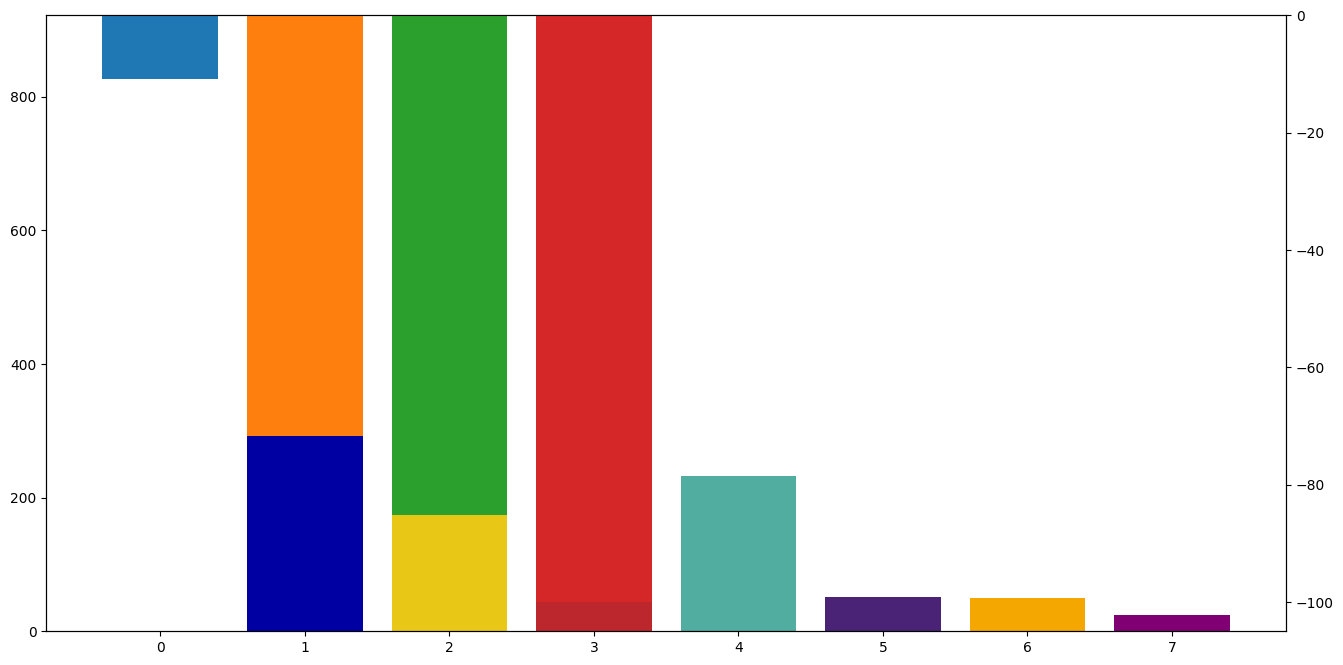

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.bar(range(1, 8), each.values(), color=outer_colors)
ax = plt.twinx()
for i, key in zip(range(4), each.keys()):
    ax.bar(i, -100*cum_each[key][i])
    '''ax.barh(i, -(data[key][0]+data[key][1]), bottom=-data[key][0])
    ax.barh(i, -(data[key][0]+data[key][1]+data[key][2]), bottom=-(data[key][0]+data[key][1]))
    ax.barh(i, -(data[key][0]+data[key][1]+data[key][2]+data[key][3]), bottom=-(data[key][0]+data[key][1]+data[key][2]))'''
